<a href="https://colab.research.google.com/github/ikuyumcu/python-ile-sat-ve-ciro-tahmini/blob/main/Colab'e_ho%C5%9F_geldiniz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 2025 Yılı Aylık Tahminler ---
         2025 Tahmin Koli  2025 Tahmin Ciro
Ocak                72396          12966302
Şubat               74413          14250173
Mart                77882          15160952
Nisan               80487          16489837
Mayıs               86863          19814313
Haziran             91313          20040641
Temmuz             104198          20263415
Ağustos             91698          21296663
Eylül               87652          22259714
Ekim                81488          23033145
Kasım               81456          20874189
Aralık              95947          22972836

--- Yıllık Toplam Beklentisi ---
Toplam Koli: 1,025,793
Toplam Ciro: 229,422,180


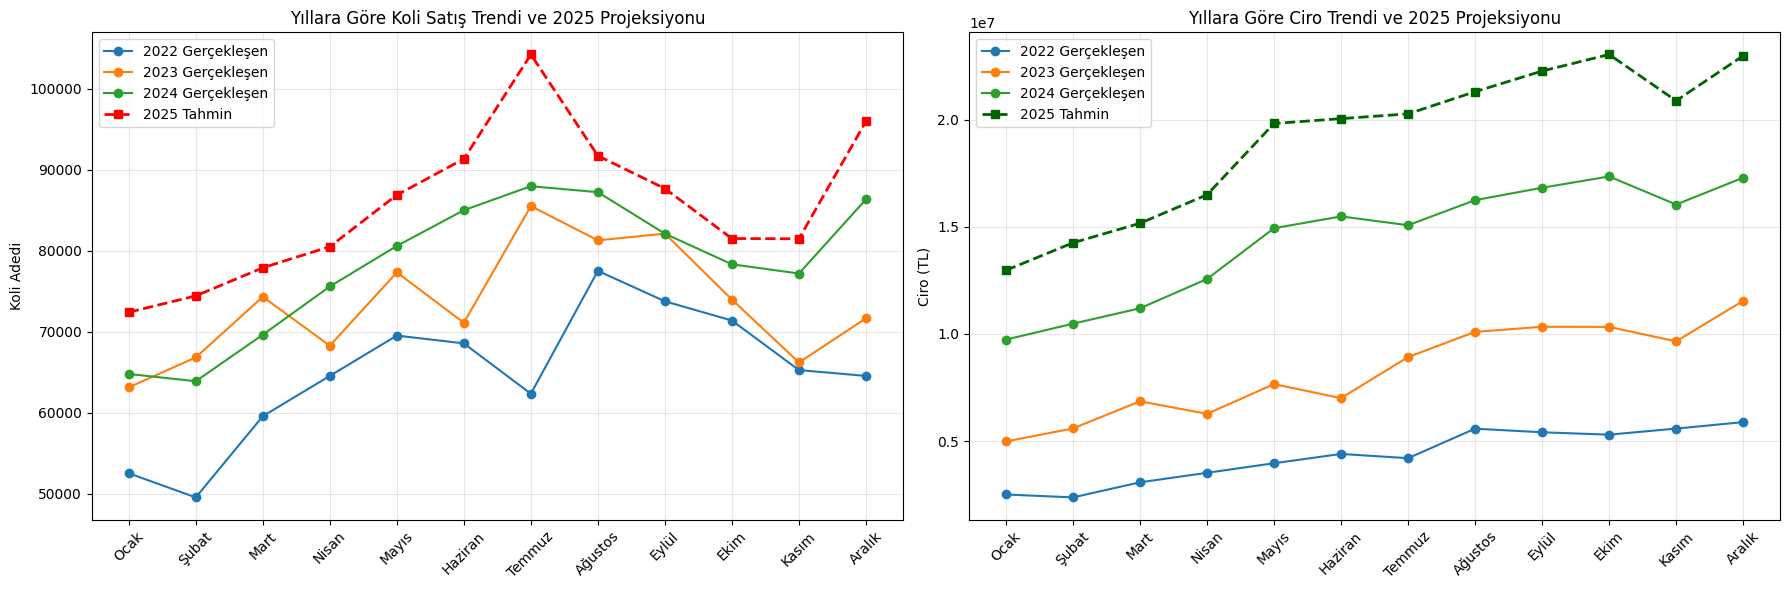

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verilerin Tanımlanması
months = ["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran",
          "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"]

# Geçmiş Koli Verileri (2022 Nisan eksik olduğu için Mart-Mayıs ortalaması ile dolduruldu)
koli_data = {
    2022: [52524, 49547, 59567, 64539, 69511, 68554, 62337, 77500, 73742, 71371, 65255, 64536],
    2023: [63124, 66817, 74303, 68259, 77311, 71099, 85492, 81262, 82091, 73965, 66197, 71638],
    2024: [64778, 63879, 69619, 75570, 80575, 84987, 87944, 87208, 82087, 78310, 77170, 86319]
}

# Geçmiş Ciro Verileri
ciro_data = {
    2022: [2509994, 2374689, 3077055, 3522345, 3967634, 4402042, 4203046, 5580180, 5411510, 5301012, 5585186, 5884385],
    2023: [4982470, 5591272, 6857257, 6272505, 7657866, 7004686, 8919825, 10094950, 10332497, 10327000, 9653711, 11543637],
    2024: [9734106, 10477156, 11194927, 12560424, 14930085, 15480330, 15069128, 16238850, 16817416, 17343615, 16034807, 17285910]
}

df_koli = pd.DataFrame(koli_data, index=months)
df_ciro = pd.DataFrame(ciro_data, index=months)

# 2025 Tahminleme Fonksiyonu (Lineer Regresyon)
years = np.array([2022, 2023, 2024])
tahmin_2025_koli = []
tahmin_2025_ciro = []

for month in months:
    # Koli Tahmini
    coef_k = np.polyfit(years, df_koli.loc[month].values, 1)
    tahmin_2025_koli.append(np.polyval(coef_k, 2025))

    # Ciro Tahmini
    coef_c = np.polyfit(years, df_ciro.loc[month].values, 1)
    tahmin_2025_ciro.append(np.polyval(coef_c, 2025))

# Sonuçları Tabloya Dönüştürme
df_2025 = pd.DataFrame({
    '2025 Tahmin Koli': np.round(tahmin_2025_koli).astype(int),
    '2025 Tahmin Ciro': np.round(tahmin_2025_ciro).astype(int)
}, index=months)

print("--- 2025 Yılı Aylık Tahminler ---")
print(df_2025)
print("\n--- Yıllık Toplam Beklentisi ---")
print(f"Toplam Koli: {df_2025['2025 Tahmin Koli'].sum():,}")
print(f"Toplam Ciro: {df_2025['2025 Tahmin Ciro'].sum():,}")

import matplotlib.pyplot as plt

# Grafiklerin hazırlanması
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# 1. Grafik: Koli Tahminleri Karşılaştırması
for year in [2022, 2023, 2024]:
    ax[0].plot(months, df_koli[year], marker='o', label=f'{year} Gerçekleşen')

ax[0].plot(months, df_2025['2025 Tahmin Koli'], marker='s', linestyle='--', color='red', linewidth=2, label='2025 Tahmin')
ax[0].set_title('Yıllara Göre Koli Satış Trendi ve 2025 Projeksiyonu', fontsize=12)
ax[0].set_ylabel('Koli Adedi')
ax[0].legend()
ax[0].grid(True, alpha=0.3)
ax[0].tick_params(axis='x', rotation=45)

# 2. Grafik: Ciro Tahminleri Karşılaştırması
for year in [2022, 2023, 2024]:
    ax[1].plot(months, df_ciro[year], marker='o', label=f'{year} Gerçekleşen')

ax[1].plot(months, df_2025['2025 Tahmin Ciro'], marker='s', linestyle='--', color='darkgreen', linewidth=2, label='2025 Tahmin')
ax[1].set_title('Yıllara Göre Ciro Trendi ve 2025 Projeksiyonu', fontsize=12)
ax[1].set_ylabel('Ciro (TL)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()